# Project Overview: Analyzing Vegetable Price Trends
<p style="text-align:center;"><img src="https://media.citizen.co.za/wp-content/uploads/2023/12/household-food-basket-prices.jpg" width=700 height=700></p>

## Introduction
Understanding the dynamics of vegetable prices is essential for both policymakers and consumers in India, given the significant impact it has on food security and economic well-being. This project focuses on exploring and analyzing a dataset that provides detailed information on vegetable prices across various regions of India. Collected from the authoritative source, the Agricultural Marketing Information Network (AGMARKNET), this dataset offers valuable insights into the fluctuating prices of 10 different types of vegetables over the course of a year.

### Dataset Description:
The dataset comprises information on the prices of 10 commonly consumed vegetables in India over a span of one year. Each entry in the dataset includes the type of vegetable, the price at which it was sold, and the corresponding timestamp indicating the date of sale. With data collected from diverse regions across India, the dataset facilitates an in-depth analysis of regional variations and seasonal trends in vegetable prices.

## Importing Packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Data Cleaning

Load the data, 
check, and change data to the correct Data types. 
For Example, The price date was an Object. This would impact our EDA section should we decide to visualize the date or make use of a trend Line

In [2]:
!kaggle datasets download -d ksamiksha19/vegetable-prices

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
df = pd.read_csv('prices.csv')
df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


In [5]:
df['Price Dates'] =pd.to_datetime(df["Price Dates"], format=  "%d-%m-%Y")
print(df['Price Dates'].dtypes)

datetime64[ns]


In [6]:
df.isna().sum()

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64

## Exploratory Data Analysis (EDA)

In [7]:
df.describe()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,2023-07-04 21:54:33.867595776,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
min,2023-01-01 00:00:00,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,2023-04-06 12:00:00,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,2023-07-04 00:00:00,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,2023-10-01 12:00:00,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,2024-01-01 00:00:00,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000
std,NaN,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973


In [8]:
df['month'] = df['Price Dates'].dt.month
df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),month
0,2023-01-01,35.0,18,22.0,20,30,50,25,8,45.0,25,1
1,2023-01-02,35.0,16,22.0,20,30,55,25,7,40.0,25,1
2,2023-01-03,35.0,16,21.0,20,30,55,25,7,40.0,25,1
3,2023-01-04,30.0,16,21.0,22,25,55,25,7,40.0,25,1
4,2023-01-08,35.0,16,20.0,21,25,55,22,6,35.0,25,1


In [22]:
df.groupby(by='month')[['Tomato','Onion','Potato','Brinjal','Garlic','Peas','Methi','Green Chilli','Elephant Yam (Suran)']].sum()

,Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
month,,,,,,,,,
1,290,313.5,367,710,1300,471,186,695.00,510
2,384,292.5,359,786,1770,745,195,962.00,660
3,416,296.0,354,576,2055,1000,187,1185.00,649
4,384,224.5,372,580,1975,1631,315,910.13,650
5,400,267.0,508,610,2305,1575,288,939.00,615
6,400,343.0,507,820,2450,1610,399,1380.00,619
7,400,414.0,493,855,3585,2640,2358,1825.00,767
8,400,537.0,505,775,3910,1930,225,1070.00,891
9,368,537.0,427,552,3720,1640,388,885.00,649


df.groupby(by='month')[['Tomato','Onion','Potato','Brinjal','Garlic','Peas','Methi','Green Chilli','Elephant Yam (Suran)']].mean()

In [36]:
Months = df['month']
bhindi_prices = df['Bhindi (Ladies finger)']

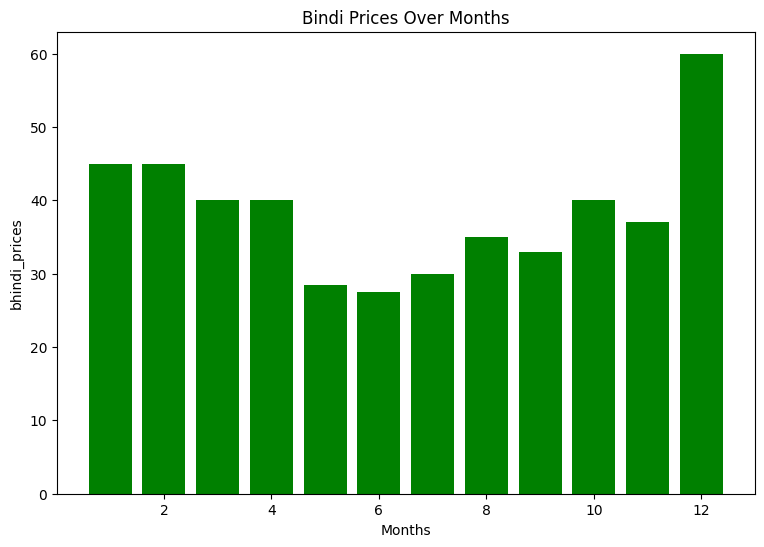

In [48]:
plt.figure(figsize=(9, 6))

plt.bar(Months, bhindi_prices, color='green', label='Bhindi (Ladies finger)')
plt.xlabel('Months')
plt.ylabel('bhindi_prices')
plt.title('Bindi Prices Over Months')

plt.show()

In [10]:
Months = df['month']
tomato_prices = df['Tomato']

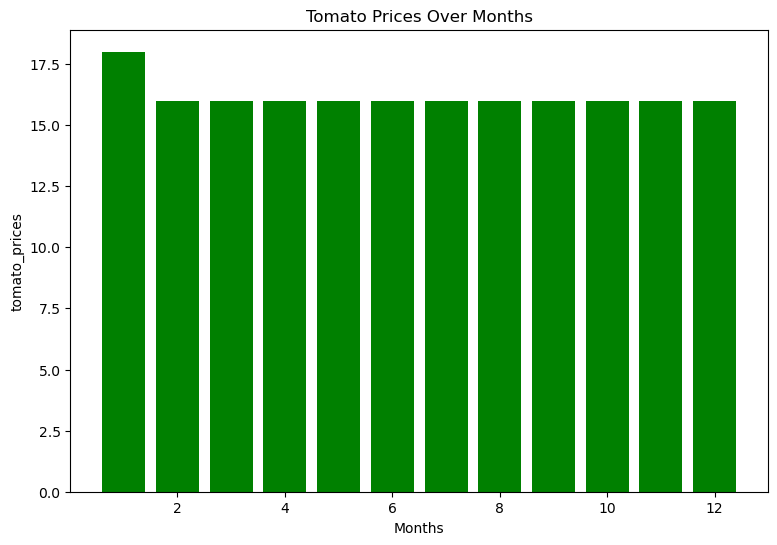

In [11]:
plt.figure(figsize=(9, 6))

plt.bar(Months, tomato_prices, color='green', label='Tomato')
plt.xlabel('Months')
plt.ylabel('tomato_prices')
plt.title('Tomato Prices Over Months')

plt.show()

In [12]:
Months = df['month']
onion_prices = df['Onion']

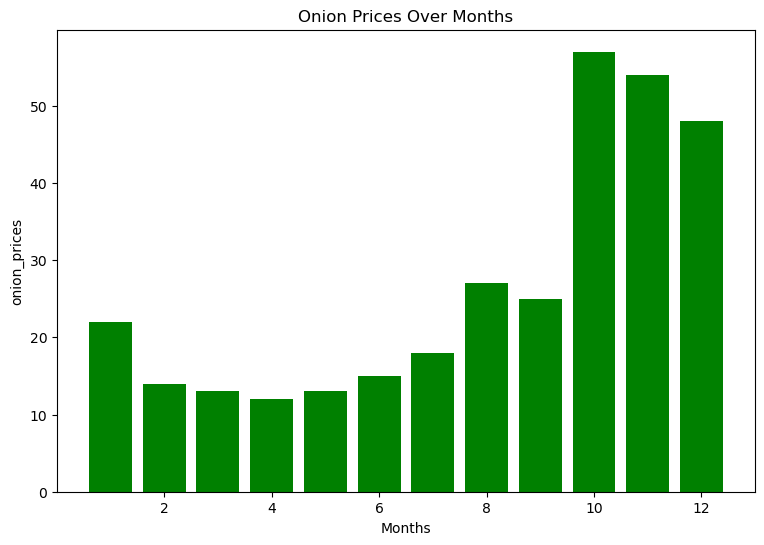

In [13]:
plt.figure(figsize=(9, 6))

plt.bar(Months, onion_prices, color='green', label='Onion')
plt.xlabel('Months')
plt.ylabel('onion_prices')
plt.title('Onion Prices Over Months')

plt.show()

In [14]:
Months = df['month']
potato_prices = df['Potato']

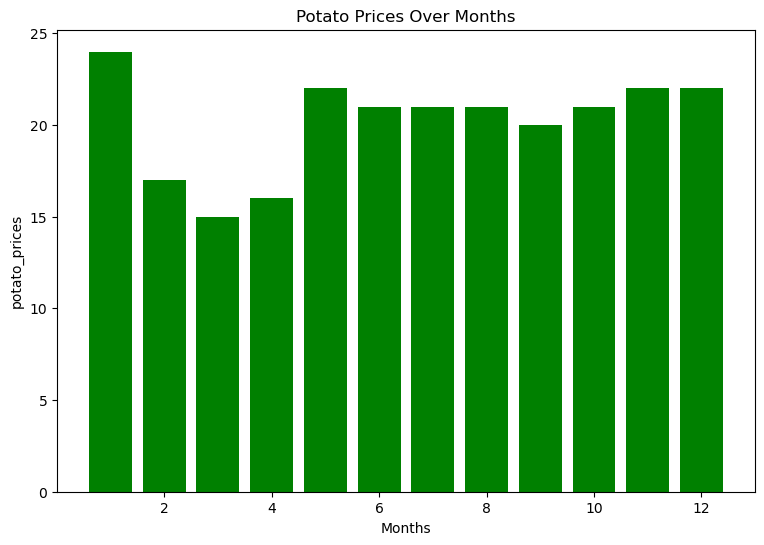

In [15]:
plt.figure(figsize=(9, 6))

plt.bar(Months, potato_prices, color='green', label='Potato')
plt.xlabel('Months')
plt.ylabel('potato_prices')
plt.title('Potato Prices Over Months')

plt.show()

In [17]:
Months = df['month']
brinjal_prices = df['Brinjal']

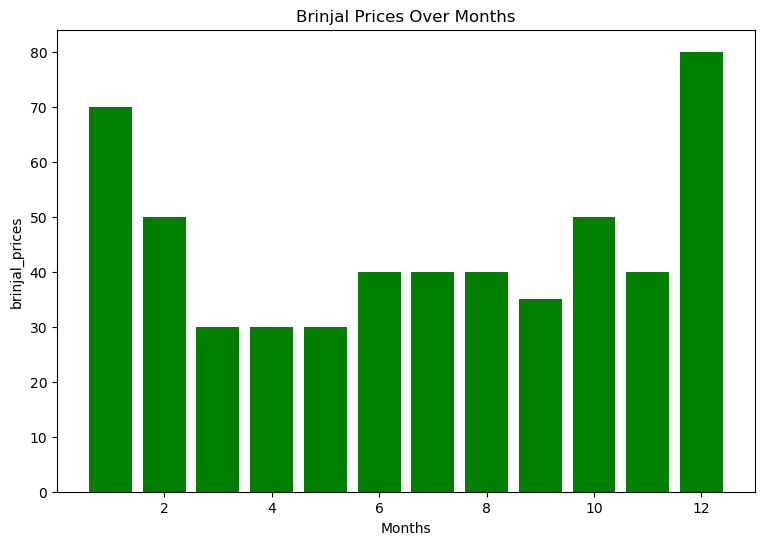

In [18]:
plt.figure(figsize=(9, 6))

plt.bar(Months, brinjal_prices, color='green', label='Brinjal')
plt.xlabel('Months')
plt.ylabel('brinjal_prices')
plt.title('Brinjal Prices Over Months')

plt.show()

In [28]:
Months = df['month']
garlic_prices = df['Garlic']

In [22]:
Months = df['month']
peas_prices = df['Peas']

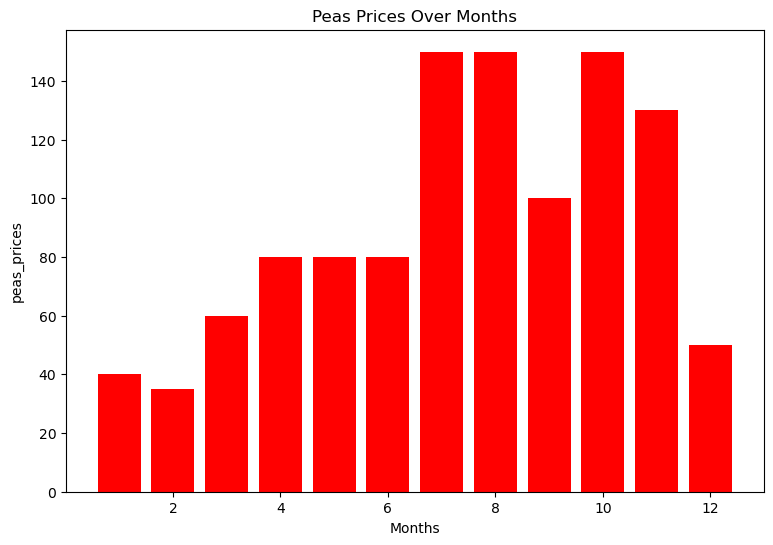

In [23]:
plt.figure(figsize=(9, 6))

plt.bar(Months, peas_prices, color='red', label='Peas')
plt.xlabel('Months')
plt.ylabel('peas_prices')
plt.title('Peas Prices Over Months')

plt.show()

In [30]:
dates = df['Price Dates']
bhindi_prices = df['Bhindi(Ladies finger)']

KeyError: 'Bhindi(Ladies finger)'

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(dates, bhindi_prices)

# Show the plot
plt.show()

NameError: name 'bhindi_prices' is not defined

<Figure size 1200x600 with 0 Axes>

## Conclusion and Insights